In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('perfils-com-rfdv-02.csv', index_col=0)

In [4]:
df.head()

,count_eventos,recencia,duracao,$browser,$city,$country_code,$os,$region,Source
0,8287,15,81,Chrome,São Paulo,BR,Windows,Sao Paulo,LA Criar Conta
1,5793,7,76,Chrome,Sao Jose do Rio Preto,BR,Windows,Sao Paulo,CC CNPJ - Painel de Dados - E-mails
2,4296,68,10,Chrome,Guarapuava,BR,Windows,Parana,LA Criar Conta
3,3669,0,93,Chrome,Londrina,BR,Windows,Parana,LA Criar Conta
4,3403,41,43,Chrome,Salto,BR,Windows,Sao Paulo,LA Criar Conta


In [5]:
df.describe()

,count_eventos,recencia,duracao
count,8201.000000,8201.000000,8201.000000
mean,67.676503,37.959029,10.061700
std,212.916102,23.809514,20.711982
min,1.000000,0.000000,0.000000
25%,5.000000,19.000000,0.000000
50%,14.000000,36.000000,0.000000
75%,51.000000,57.000000,7.000000
max,8287.000000,84.000000,100.000000


In [6]:
pd.get_dummies(df)

,count_eventos,recencia,duracao,$browser_Chrome,$browser_Chrome iOS,$browser_Firefox,$browser_Microsoft Edge,$browser_Mobile Safari,$browser_Opera,$browser_Safari,...,Source_CC Segmento - Empresa Similar,Source_CC Segmento - Encontrar Agora,Source_CC Segmento - Limite Consultas,Source_CC Segmento - Painel de Dados - E-mails,Source_CC Segmento - Painel de Dados - Telefones,Source_CC Segmento - Ver Todas Empresas,Source_LA Criar Conta,Source_LA IS Lead,Source_LA IS Oportunidade,Source_unknown
0,8287,15,81,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5793,7,76,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4296,68,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3669,0,93,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3403,41,43,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8196,1,76,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8197,1,9,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8198,1,15,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8199,1,83,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


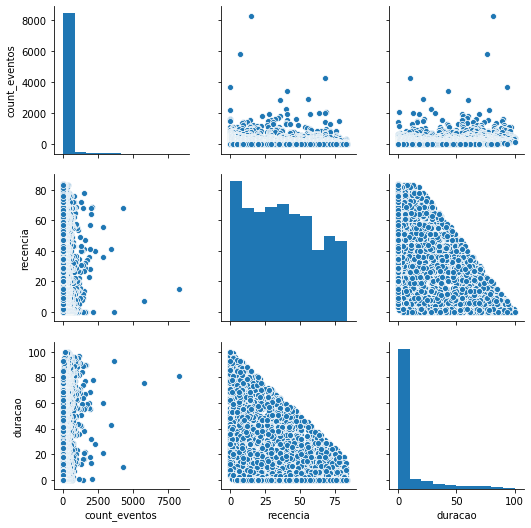

In [7]:
sns.pairplot(df)

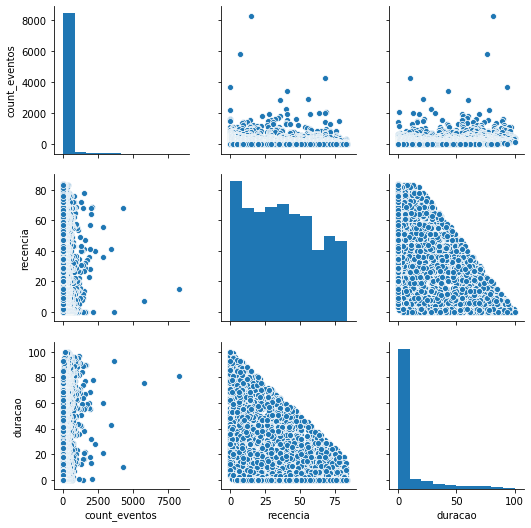

In [8]:
# sns.pairplot(df.apply(np.log1p))
sns.pairplot(df)

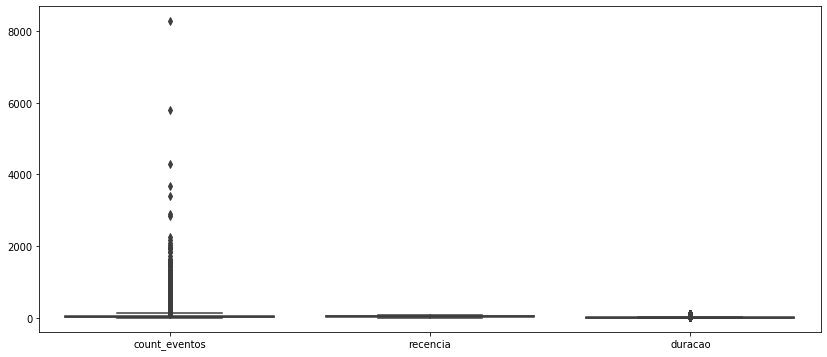

In [10]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df)

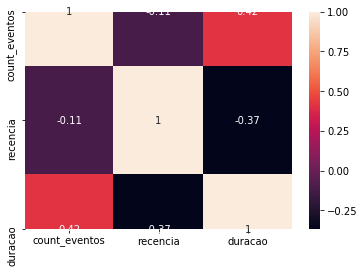

In [11]:
sns.heatmap(df.corr(), annot=True)